# MA333 Project 1

11711416 MingjiHan

### Overview

In the project, we are going to implement the linear regression algorithm and test it on dataset.

### Formula Derivation

#### 1.The log-likelihood function

$$
\begin{align}
l(\textbf{w})&=\sum_{i=1}^{n} log(p_1(\textbf{x}_i;\textbf{w})^{y_i}p_0(\textbf{x}_i;\textbf{w})^{1-y_i}) \\
      &=\sum_{i=1}^{n} y_ilog(p_1(\textbf{x}_i;\textbf{w}))+(1-y_i)log(p_0(\textbf{x}_i;w))\\
        &=\sum_{i=1}^{n} y_ilog(p(\textbf{x}_i;\textbf{w}))+(1-y_i)log(1 - p(\textbf{x}_i;w))\\
          &=\sum_{i=1}^{n} y_ilog(\frac{e^{\textbf{w}^T\textbf{x}_i}}{1+e^{\textbf{w}^T\textbf{x}_i}})+(1-y_i)log(\frac{1}{1+e^{\textbf{w}^T\textbf{x}_i}})\\
            &=\sum_{i=1}^{n} y_ilog(e^{\textbf{w}^T\textbf{x}_i}) - y_ilog(1+e^{\textbf{w}^T\textbf{x}_i}) +(y_i-1)log({1+e^{\textbf{w}^T\textbf{x}_i}})\\
              &=\sum_{i=1}^{n} y_i{\textbf{w}^T\textbf{x}_i} -log({1+e^{\textbf{w}^T\textbf{x}_i}})\\
\end{align}     
$$


#### 2. Score Equation

Based on the formula derived from part 1,we can continue expand it

$$
\begin{align}
l(\textbf{w})&=\sum_{i=1}^{n} y_i{\textbf{w}^T\textbf{x}_i} -log({1+e^{\textbf{w}^T\textbf{x}_i}})\\
    &=\sum_{i=1}^{n} y_i\sum_{j=1}^d x_{ij}w_j-log({1+e^{\textbf{w}^T\textbf{x}_i}})\\
\end{align}
$$

Then we find the partial derivative of $ w_j (j = 0,1,2,3 .... d) $

$$
\begin{align}
\frac{\partial{L(\textbf{w})}}{\partial{w_j}}&=\sum_{i=1}^{n} y_ix_{ij}- \frac{x_{ij}e^{\textbf{w}^T\textbf{x}_i} }{1+e^{\textbf{w}^T\textbf{x}_i}}\\
&=\sum_{i=1}^{n}x_{ij}(y_i - p(\textbf{x}_i\textbf{;}\textbf{w}) )\\
\end{align}
$$

$$
\begin{align}
\frac{\partial{L(\textbf{w})}}{\partial{w_j}}=0\\
\sum_{i=1}^{n}x_{ij}(y_i - p(\textbf{x}_i\textbf{;}\textbf{w})) = 0\\
\end{align}
$$

#### 3.Hessian matrix

Consider the j th element of k th row in the Hessian Matrix.
We want to find:

$$
\begin{align}
\frac{\partial{L(\textbf{w})}}{\partial{w_k}\partial{w_j}}
\end{align}
$$

Fron Problem 2 we know 

$$
\begin{align}
\frac{\partial{L(\textbf{w})}}{\partial{w_j}}&=\sum_{i=1}^{n}x_{ij}(y_i - p(\textbf{x}_i\textbf{;}\textbf{w}) )
\end{align}
$$

So

$$
\begin{align}
\frac{\partial{L(\textbf{w})}}{\partial{w_k}\partial{w_j}}&=-\sum_{i=1}^{n}x_{ij} \frac{x_{ik}e^{\textbf{w}^T\textbf{x}_i}({1+e^{\textbf{w}^T\textbf{x}_i}}) - e^{\textbf{w}^T\textbf{x}_i} e^{\textbf{w}^T\textbf{x}_i} x_{ik}}{({1+e^{\textbf{w}^T\textbf{x}_i}})^2}\\
&=-\sum_{i=1}^{n}x_{ik}x_{ij} \frac{e^{\textbf{w}^T\textbf{x}_i}} {({1+e^{\textbf{w}^T\textbf{x}_i}})^2}\\
&=-\sum_{i=1}^{n}x_{ik}x_{ij} \frac{e^{\textbf{w}^T\textbf{x}_i}} {{1+e^{\textbf{w}^T\textbf{x}_i}}} \frac{1} {{1+e^{\textbf{w}^T\textbf{x}_i}}}\\
&=-\sum_{i=1}^{n}x_{ik}x_{ij}p(\textbf{x}_i;\textbf{w})(1-p(\textbf{x}_i;\textbf{w}))
\end{align}
$$

$$
\begin{align}
\frac{\partial{L(\textbf{w})}}{\partial{\textbf{w}}\partial\textbf{w}^T}
&=-\sum_{i=1}^{n}\textbf{x}_i\textbf{x}^T_{i}p(\textbf{x}_i;\textbf{w})(1-p(\textbf{x}_i;\textbf{w}))
\end{align}
$$

#### 4.Matrix Notation of IRLS

Fristly we convert the derivative into matrix form

$$
\begin{align}
\frac{\partial{L(\textbf{w})}}{\partial{\textbf{w}}\partial\textbf{w}^T}
&=-\sum_{i=1}^{n}\textbf{x}_i\textbf{x}^T_{i}p(\textbf{x}_i;\textbf{w})(1-p(\textbf{x}_i;\textbf{w}))\\
&=-(X^TDX)^{-1}\\
\end{align}
$$

$$
\begin{align}
\frac{\partial{L(\textbf{w})}}{\partial{w_j}}&=\sum_{i=1}^{n}x_{ij}(y_i - p(\textbf{x}_i\textbf{;}\textbf{w}) )\\
\frac{\partial{L(\textbf{w})}}{\partial \textbf{w}}&= X^{-1}(\textbf{y}-\textbf{p})\\
\end{align}
$$

Then we get the matrix form of $ \textbf{w}^{(k)} $

$$
\begin{align}
\textbf{w}^{(k)} &=  \textbf{w}^{(k - 1)} -  (\frac{\partial^2 l(\textbf{w})}{\partial\textbf{w}\partial\textbf{w}^T})^{-1}\bigg|_{\textbf{w}^{(k - 1)}} (\frac{\partial l(\textbf{w})}{\partial\textbf{w}})^{-1}\bigg|_{\textbf{w}^{(k - 1)}}\\
&= \textbf{w}^{(k - 1)} + (X^TDX)^{-1}X^T(\textbf{y}-\textbf{p})\\
&= (X^TDX)^{-1}((X^TDX)\textbf{w}^{(k - 1)} + X^T(\textbf{y}-\textbf{p}))\\
&= (X^TDX)^{-1}X^TD(X\textbf{w}^{(k - 1)} + D^{-1}(\textbf{y}-\textbf{p}))\\
&= (X^TDX)^{-1}X^TD\textbf{z}\\
&= \mathop{argmin}\limits_{\textbf{w}}(\textbf{z}-X\textbf{w})^TD (\textbf{z}-X\textbf{w})\\
\end{align}
$$

### IRLS Algorithm

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize 
def exp(x):
    return np.exp(x)

'''IRLS Alogrithm for Logistic Regression
   
   Args:
       X:Training data, a n *(d+1) matrix
       y:Class of training data, n*1 column vector
       error: Error bound of w
   Return:
       w: Weights, a (d+1) * 1 column vector 
   Notice: In order to avoid finding the inverse singular matrix which will crash the program,
           we use np.linalg.pinv() to get the "inverse" of martix 
'''
def IRIS(X,y,print_loss=True,error=1e-3,step=10):
    print("Algorithm starts.")
    
    w = np.random.random((X.shape[1],1))
    w_pre = w
    loss = []
    iter = 0
    
    while True:
        inner_product = X.dot(w) 
        
        p = exp(inner_product) / (1.0 + exp(inner_product))
       
        D = np.diag(p.T[0])
       
        w = w + np.dot(np.dot(np.linalg.pinv(np.dot(np.dot(X.T,D),X)),X.T),y - p)
        
        diff = np.sum(np.abs(w - w_pre))
        
        if diff < error:
            break
        else:
            w_pre = w
            
        if (iter+1) % 2 == 0:
            if print_loss:
                print(diff)
            loss.append(diff)
        iter += 1
        
    print("Algorithm finished.")   
    return w,loss

In [4]:
X = np.random.random((10,6))#np.array([[0.1,0.7,2.4],[4.1,5.8,6.2],[7.7,8.5,9.3]])
y = np.array([[1.0],[0.0],[0.0],[1.0],[0.0],[1.0],[0.0],[0.0],[1.0],[0.0]])
w,loss = IRIS(X,y,False,1e-3)

Algorithm starts.
Algorithm finished.


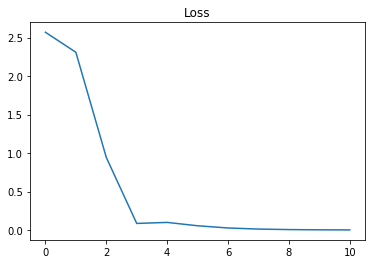

In [5]:
plt.title("Loss")
plt.plot(loss)

### Test algorithm on South African Hearth dataset

1.Define function for reading the dataset

In [6]:
import os
from sklearn import metrics
def read_dataset(file_name):
    f = open(file_name)
    data_x = []
    data_y = []
    for line in f.readlines():
        if line[0] !='@':
            line = line.strip('\n')
            items = line.split(', ')

            data_row = [1] # for w0
            for i in range(len(items)):
                if i == 4:
                    if items[i] == 'Absent':
                        data_row.append(1.0)
                        data_row.append(0.0)
                    else:
                        data_row.append(0.0)
                        data_row.append(1.0)
                elif i == 9:
                    data_y.append([int(items[i])])
                else:
                    data_row.append(float(items[i]))
            data_x.append(data_row)
           # print(items)
    data_x = np.array(data_x)
    data_y = np.array(data_y)
    return (data_x,data_y)

2.Define the function for traininng and testing

In [65]:
from sklearn import preprocessing
def train_and_test(num,threashold=0.75):
    (data_x,data_y) = read_dataset('./saheart-5-fold/saheart-5-'+str(num)+'tra.dat')
    data_x = preprocessing.scale(data_x)
    w1,loss1 = IRIS(data_x,data_y,False,1e-2)
    plt.title("Loss")
    plt.plot(loss1)
    (test_x,test_y) = read_dataset('./saheart-5-fold/saheart-5-'+str(num)+'tst.dat')
    test_x = preprocessing.scale(test_x)
    y = test_x.dot(w1)
    y  = exp(y) / (1.0 + exp(y))
    y_pred = y.T > 0.75
    y_pred = 1 * y_pred
    
    score = metrics.accuracy_score(test_y.T[0],y_pred[0])
    print("Accuracy: " + str(score))
    print("Precision score:"+str(precision_score(y_pred[0],test_y)))
    mat = confusion_matrix(test_y, y_pred[0])
    plt.matshow(confusion_matrix(test_y, y_pred[0]))
    plt.text(0,0,mat[0][0])
    plt.text(0,1,mat[0][1])
    plt.text(1,0,mat[1][0])
    plt.text(1,1,mat[1][1])
    plt.colorbar()

3.Train and test

Algorithm starts.
Algorithm finished.
Accuracy: 0.7204301075268817
Precision score:0.375


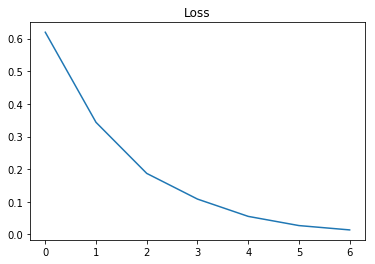

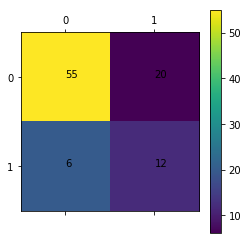

In [66]:
train_and_test(1)

Algorithm starts.
Algorithm finished.
Accuracy: 0.7419354838709677
Precision score:0.34375


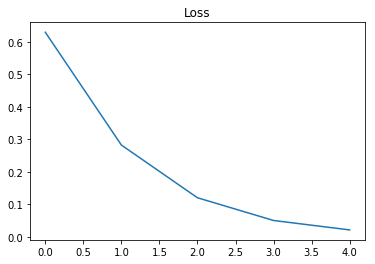

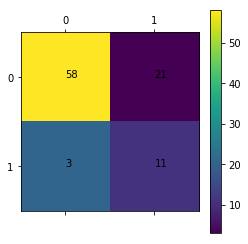

In [67]:
train_and_test(2)

Algorithm starts.
Algorithm finished.
Accuracy: 0.7717391304347826
Precision score:0.4375


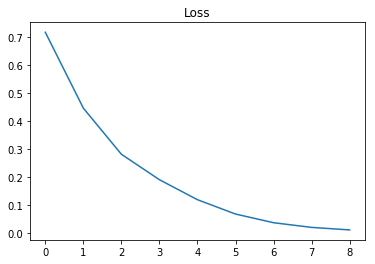

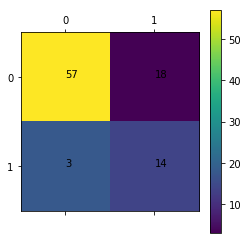

In [68]:
train_and_test(3)

Algorithm starts.
Algorithm finished.
Accuracy: 0.75
Precision score:0.46875


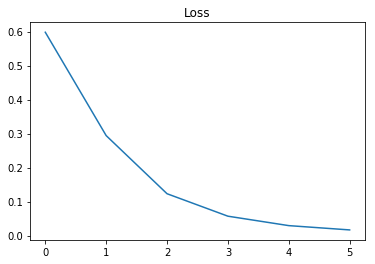

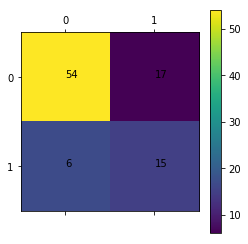

In [69]:
train_and_test(4)

Algorithm starts.
Algorithm finished.
Accuracy: 0.6630434782608695
Precision score:0.25


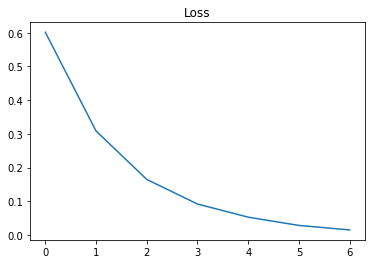

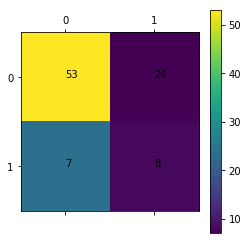

In [70]:
train_and_test(5)

4.Train and test on sklearn

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [72]:
def sk_train_and_test(num,threashold=0.75):
    (data_x,data_y) = read_dataset('./saheart-5-fold/saheart-5-'+str(num)+'tra.dat')
    data_x = preprocessing.scale(data_x)
    clf = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='ovr').fit(data_x, data_y)
    (test_x,test_y) = read_dataset('./saheart-5-fold/saheart-5-'+str(num)+'tst.dat')
    test_x = preprocessing.scale(test_x)
    y_pred = clf.predict(test_x)
    score = metrics.accuracy_score(test_y.T[0],y_pred)
    print("Accuracy: " + str(score))
    print("Precision score:"+str(precision_score(y_pred,test_y)))
    mat = confusion_matrix(test_y, y_pred)
    plt.matshow(confusion_matrix(test_y, y_pred))
    plt.text(0,0,mat[0][0])
    plt.text(0,1,mat[0][1])
    plt.text(1,0,mat[1][0])
    plt.text(1,1,mat[1][1])
    plt.colorbar()

Accuracy: 0.7419354838709677
Precision score:0.5


c:\users\mingji han\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


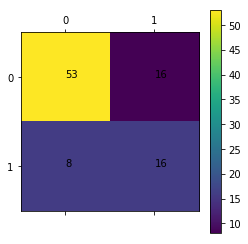

In [73]:
sk_train_and_test(1)

Accuracy: 0.7634408602150538
Precision score:0.53125


c:\users\mingji han\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


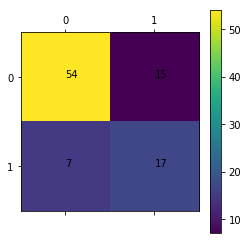

In [74]:
sk_train_and_test(2)

Accuracy: 0.7065217391304348
Precision score:0.46875


c:\users\mingji han\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


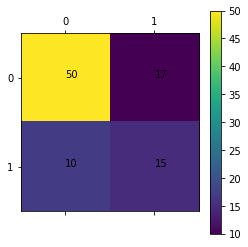

In [75]:
sk_train_and_test(3)

Accuracy: 0.7391304347826086
Precision score:0.5625


c:\users\mingji han\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


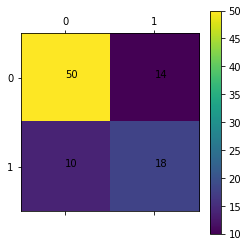

In [76]:
sk_train_and_test(4)

Accuracy: 0.6630434782608695
Precision score:0.40625


c:\users\mingji han\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


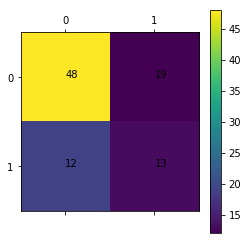

In [77]:
sk_train_and_test(5)

## Conclusion

The algorithm we design is as good as the logistic regression in scikit-learn.

Our alogrithm can be improved through ensemble method.